# 21BAI1133 - Mukundh J

# ML Lab assignment 9 - Perceptron, MLP

###### Q1. Implement a perceptron model to realize AND gate. Start with the weights as [0.5, 0.5]. Update the weights using perceptron learning algorithm. Print the model parameters after every epoch. Use suitable learning rate.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def perceptron(epoch,weights, inputs, outputs, learning_rate,bias):
  for epoch in range(epoch):
      print(f"Epoch {epoch+1}:")
      for i in range(len(inputs)):
          weighted_sum = inputs[i][0] * weights[0] + inputs[i][1] * weights[1] + bias
          
          if weighted_sum >= 0:
              output = 1
          else:
              output = 0
          
          error = outputs[i] - output
          weights[0] += learning_rate * error * inputs[i][0]
          weights[1] += learning_rate * error * inputs[i][1]
          bias += learning_rate * error
          for i in weights:
            for j in weights:
              i = round(i,2)
              j = round(j,2)
          print(f"Weights: {weights}, Bias: {round(bias,4)}")  

In [3]:
weights = [0.5, 0.5]
inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
outputs = [0, 0, 0, 1]
learning_rate = 0.01
bias = 0.0
epoch = 10

In [4]:
perceptron(epoch,weights, inputs, outputs, learning_rate,bias)

Epoch 1:
Weights: [0.5, 0.5], Bias: -0.01
Weights: [0.5, 0.49], Bias: -0.02
Weights: [0.49, 0.49], Bias: -0.03
Weights: [0.49, 0.49], Bias: -0.03
Epoch 2:
Weights: [0.49, 0.49], Bias: -0.03
Weights: [0.49, 0.48], Bias: -0.04
Weights: [0.48, 0.48], Bias: -0.05
Weights: [0.48, 0.48], Bias: -0.05
Epoch 3:
Weights: [0.48, 0.48], Bias: -0.05
Weights: [0.48, 0.47], Bias: -0.06
Weights: [0.47, 0.47], Bias: -0.07
Weights: [0.47, 0.47], Bias: -0.07
Epoch 4:
Weights: [0.47, 0.47], Bias: -0.07
Weights: [0.47, 0.45999999999999996], Bias: -0.08
Weights: [0.45999999999999996, 0.45999999999999996], Bias: -0.09
Weights: [0.45999999999999996, 0.45999999999999996], Bias: -0.09
Epoch 5:
Weights: [0.45999999999999996, 0.45999999999999996], Bias: -0.09
Weights: [0.45999999999999996, 0.44999999999999996], Bias: -0.1
Weights: [0.44999999999999996, 0.44999999999999996], Bias: -0.11
Weights: [0.44999999999999996, 0.44999999999999996], Bias: -0.11
Epoch 6:
Weights: [0.44999999999999996, 0.44999999999999996], Bi

###### Q2. Design a perceptron network to classify Iris plants into three species. Need to draw the network architecture and upload it in LMS along with python notebook. Implement the same with Sklearn library (MLP classifier). Fine tune the hyper parameters to get maximum accuracy.

In [5]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [6]:
iris = load_iris()
X = iris.data
y = iris.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=500, random_state=42)

In [9]:
model.fit(X_train, y_train)

/Users/mukundhjayapal/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500, random_state=42)

/Users/mukundhjayapal/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


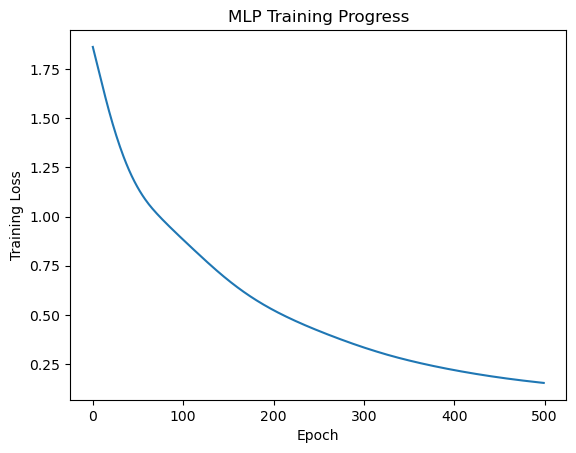

In [10]:
training_losses = model.fit(X_train, y_train).loss_curve_

# Plot the training losses
plt.plot(training_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('MLP Training Progress')
plt.show()

In [11]:
y_pred = model.predict(X_test)

In [12]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 0])

In [13]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

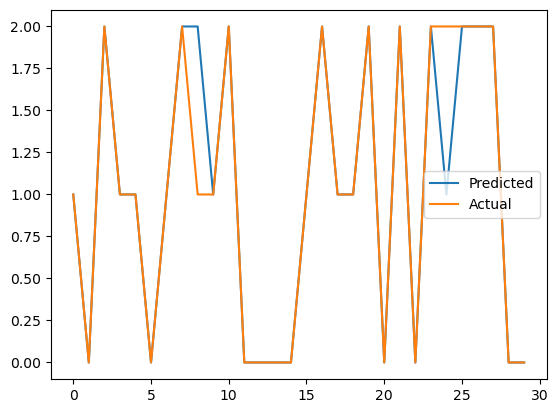

In [14]:
plt.plot(y_pred, label='Predicted')
plt.plot(y_test, label='Actual')
plt.legend()
plt.show()

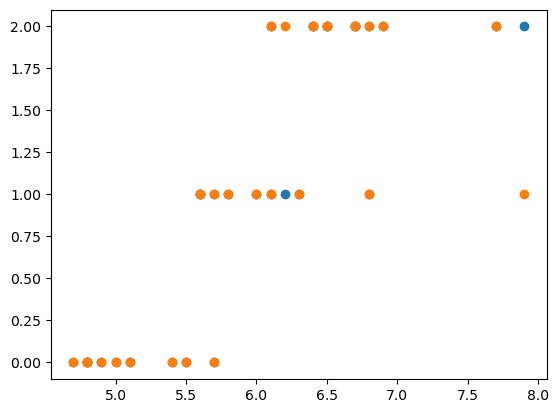

In [15]:
plt.scatter(X_test[:,0],y_test)
plt.scatter(X_test[:,0],y_pred)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", round(accuracy*100,4),"%")

Accuracy:  93.3333 %
